In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras.regularizers import l2
from keras.regularizers import l1_l2
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('diabetes.csv')

Explore Data

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

Visualização de dados

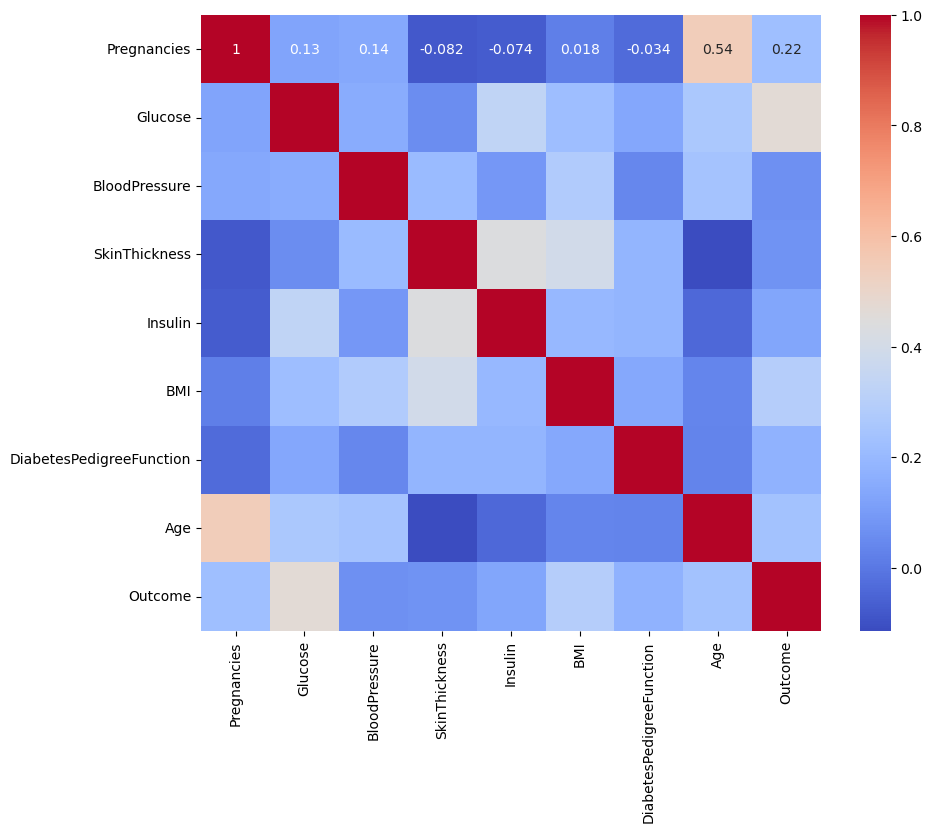

In [11]:
continuous_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

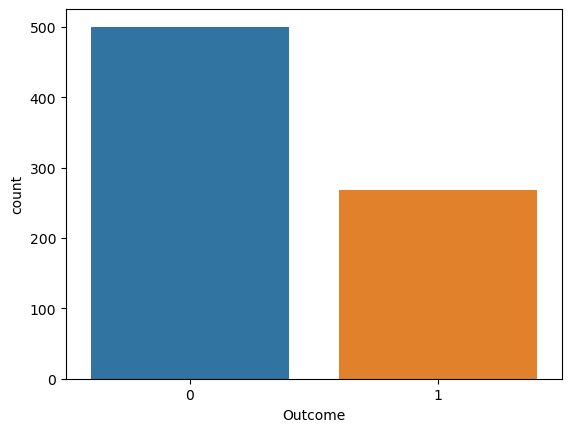

In [12]:
sns.countplot(x='Outcome',data=df)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_19636\891667685.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'] )
c:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distripution plot'}, xlabel='Pregnancies', ylabel='Density'>

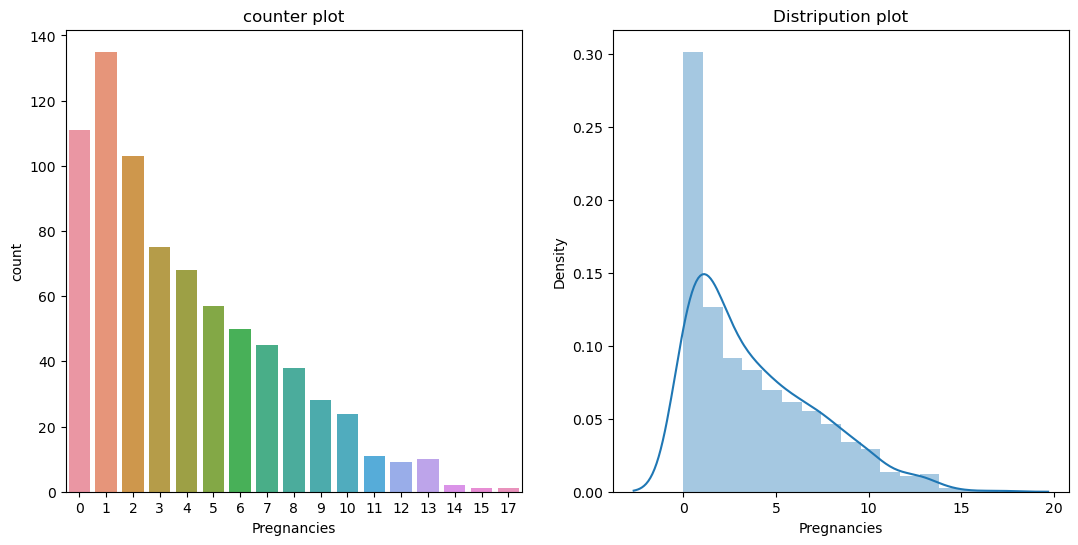

In [13]:
plt.figure(figsize =(20,6))
plt.subplot (1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data= df)

plt.subplot (1,3,2)
plt.title('Distripution plot')
sns.distplot(df['Pregnancies'] )

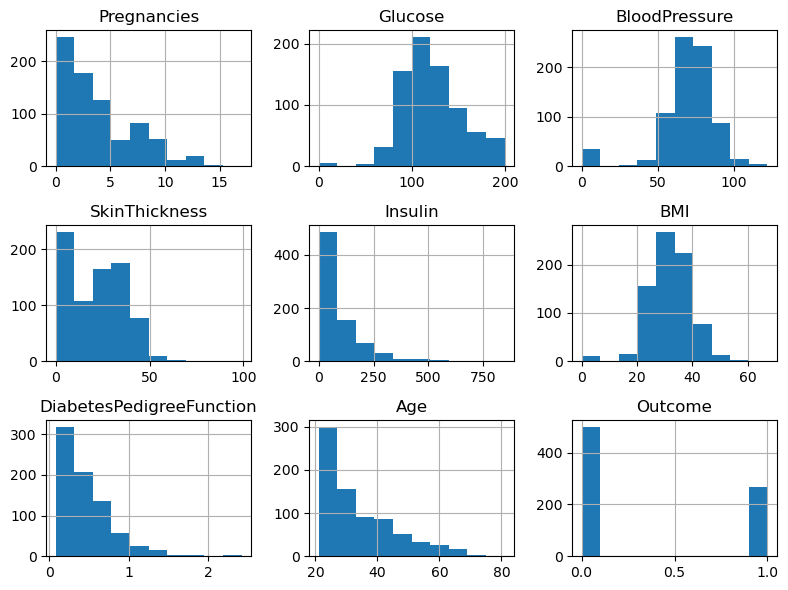

In [14]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

Criar o modelo

In [15]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] * df['Age']
df['BMI_Age'] = df['BMI'] * df['Age']

In [16]:
X=df.drop('Outcome', axis=1)
y= df['Outcome']

In [17]:
#important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

In [18]:
#X_important = X[important_features]

In [19]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

SMOTE

In [20]:
#ros = RandomOverSampler(random_state=42)
#X_ros,y_ros = ros.fit_resample(X,y)

smote = SMOTE(random_state=42)
X_ros,y_ros = smote.fit_resample(X,y)

<Axes: xlabel='Outcome', ylabel='count'>

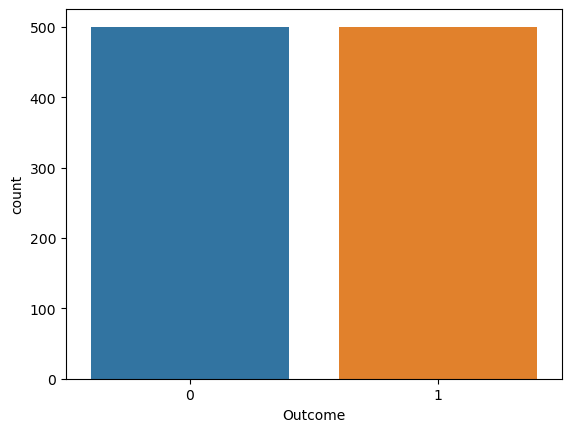

In [21]:
sns.countplot(data=df,x=y_ros)

In [22]:
X_trainOver, X_testOver, y_trainOver, y_testOver = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_trainOver = scaler.fit_transform(X_trainOver)
X_testOver = scaler.transform(X_testOver)

Modelo RBN

In [24]:
pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, random_state=42),  # Usar K-Means para gerar centros das funções de base radial
    MLPClassifier(hidden_layer_sizes=(100,50,40), activation='tanh', max_iter=200, verbose=1,alpha=0.001,solver='adam',random_state=42)
)

In [25]:
pipeline.fit(X_trainOver, y_trainOver)

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteration 1, loss = 0.65527259
Iteration 2, loss = 0.60261698
Iteration 3, loss = 0.56803736
Iteration 4, loss = 0.55165429
Iteration 5, loss = 0.54682855
Iteration 6, loss = 0.54353029
Iteration 7, loss = 0.54103046
Iteration 8, loss = 0.53748212
Iteration 9, loss = 0.53806105
Iteration 10, loss = 0.53543571
Iteration 11, loss = 0.53479631
Iteration 12, loss = 0.53585649
Iteration 13, loss = 0.53128270
Iteration 14, loss = 0.53418931
Iteration 15, loss = 0.52912434
Iteration 16, loss = 0.52812902
Iteration 17, loss = 0.52882041
Iteration 18, loss = 0.52681168
Iteration 19, loss = 0.52627393
Iteration 20, loss = 0.52624011
Iteration 21, loss = 0.52566281
Iteration 22, loss = 0.52555628
Iteration 23, loss = 0.52550212
Iteration 24, loss = 0.52290603
Iteration 25, loss = 0.52770190
Iteration 26, loss = 0.52103059
Iteration 27, loss = 0.52340428
Iteration 28, loss = 0.52070493
Iteration 29, loss = 0.52022241
Iteration 30, loss = 0.52049265
Iteration 31, loss = 0.52019520
Iteration 32, los

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=(100, 50, 40),
                               random_state=42, verbose=1))])

In [26]:
y_pred4 = pipeline.predict(X_testOver)

In [27]:
print("Acurácia:", accuracy_score(y_testOver, y_pred4))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_testOver, y_pred4))
print("\nRelatório de Classificação:")
print(classification_report(y_testOver, y_pred4))

Acurácia: 0.715

Matriz de Confusão:
[[65 34]
 [23 78]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70        99
           1       0.70      0.77      0.73       101

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [28]:
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X_trainOver, y_trainOver, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [29]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

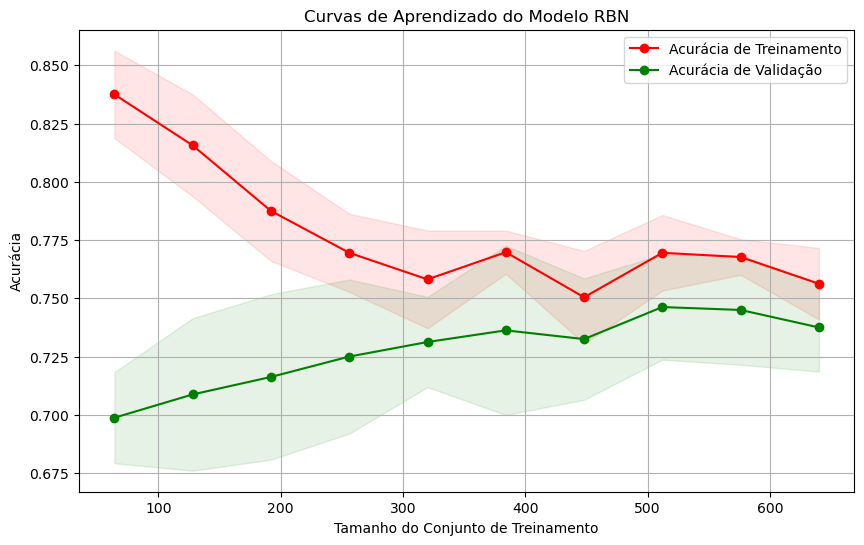

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Acurácia de Treinamento')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Acurácia de Validação')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

plt.title('Curvas de Aprendizado do Modelo RBN')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

In [31]:
scores = cross_val_score(pipeline, X_ros, y_ros, cv=5, scoring='accuracy')

print(f"Acurácia média com validação cruzada: {scores.mean():.2f}")
print(f"Desvio padrão da acurácia com validação cruzada: {scores.std():.2f}")

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteration 1, loss = 0.69552104
Iteration 2, loss = 0.62650803
Iteration 3, loss = 0.57847010
Iteration 4, loss = 0.56061970
Iteration 5, loss = 0.55135193
Iteration 6, loss = 0.54967525
Iteration 7, loss = 0.54698117
Iteration 8, loss = 0.54300689
Iteration 9, loss = 0.54054364
Iteration 10, loss = 0.53900269
Iteration 11, loss = 0.53867840
Iteration 12, loss = 0.53784191
Iteration 13, loss = 0.53771776
Iteration 14, loss = 0.53408982
Iteration 15, loss = 0.53464330
Iteration 16, loss = 0.53338236
Iteration 17, loss = 0.53272080
Iteration 18, loss = 0.53236070
Iteration 19, loss = 0.53255540
Iteration 20, loss = 0.53266737
Iteration 21, loss = 0.53081482
Iteration 22, loss = 0.52905448
Iteration 23, loss = 0.52908704
Iteration 24, loss = 0.52781325
Iteration 25, loss = 0.52830384
Iteration 26, loss = 0.52711261
Iteration 27, loss = 0.52721144
Iteration 28, loss = 0.52595913
Iteration 29, loss = 0.52756399
Iteration 30, loss = 0.52484460
Iteration 31, loss = 0.52482169
Iteration 32, los

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteration 1, loss = 0.65911397
Iteration 2, loss = 0.59996939
Iteration 3, loss = 0.56162279
Iteration 4, loss = 0.54767066
Iteration 5, loss = 0.54132694
Iteration 6, loss = 0.53936357
Iteration 7, loss = 0.53546824
Iteration 8, loss = 0.53141912
Iteration 9, loss = 0.52920276
Iteration 10, loss = 0.52880220
Iteration 11, loss = 0.52868478
Iteration 12, loss = 0.53099223
Iteration 13, loss = 0.52511434
Iteration 14, loss = 0.52522232
Iteration 15, loss = 0.52407474
Iteration 16, loss = 0.52309672
Iteration 17, loss = 0.52211421
Iteration 18, loss = 0.52091260
Iteration 19, loss = 0.52073524
Iteration 20, loss = 0.51991388
Iteration 21, loss = 0.51924852
Iteration 22, loss = 0.51914552
Iteration 23, loss = 0.51660169
Iteration 24, loss = 0.51921998
Iteration 25, loss = 0.52169720
Iteration 26, loss = 0.51807442
Iteration 27, loss = 0.51728801
Iteration 28, loss = 0.51484040
Iteration 29, loss = 0.51516546
Iteration 30, loss = 0.51281055
Iteration 31, loss = 0.51169983
Iteration 32, los

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteration 1, loss = 0.63992436
Iteration 2, loss = 0.57916577
Iteration 3, loss = 0.55905948
Iteration 4, loss = 0.55818814
Iteration 5, loss = 0.55445248
Iteration 6, loss = 0.54767565
Iteration 7, loss = 0.54412104
Iteration 8, loss = 0.54380461
Iteration 9, loss = 0.54269532
Iteration 10, loss = 0.54173332
Iteration 11, loss = 0.54064596
Iteration 12, loss = 0.53918861
Iteration 13, loss = 0.53892561
Iteration 14, loss = 0.54077591
Iteration 15, loss = 0.53858330
Iteration 16, loss = 0.54001158
Iteration 17, loss = 0.53716111
Iteration 18, loss = 0.53835946
Iteration 19, loss = 0.53654641
Iteration 20, loss = 0.53701560
Iteration 21, loss = 0.53431480
Iteration 22, loss = 0.53603979
Iteration 23, loss = 0.53666404
Iteration 24, loss = 0.53392907
Iteration 25, loss = 0.53237660
Iteration 26, loss = 0.53120569
Iteration 27, loss = 0.53043413
Iteration 28, loss = 0.53100477
Iteration 29, loss = 0.53012610
Iteration 30, loss = 0.52882576
Iteration 31, loss = 0.53019473
Iteration 32, los

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteration 1, loss = 0.65493678
Iteration 2, loss = 0.59479067
Iteration 3, loss = 0.56456565
Iteration 4, loss = 0.55881935
Iteration 5, loss = 0.55573802
Iteration 6, loss = 0.54960269
Iteration 7, loss = 0.54654625
Iteration 8, loss = 0.54590638
Iteration 9, loss = 0.54579018
Iteration 10, loss = 0.54421188
Iteration 11, loss = 0.54426905
Iteration 12, loss = 0.54232546
Iteration 13, loss = 0.54335331
Iteration 14, loss = 0.54399772
Iteration 15, loss = 0.54331882
Iteration 16, loss = 0.54099501
Iteration 17, loss = 0.54103662
Iteration 18, loss = 0.54166742
Iteration 19, loss = 0.53963257
Iteration 20, loss = 0.53853081
Iteration 21, loss = 0.53885285
Iteration 22, loss = 0.53921264
Iteration 23, loss = 0.53772252
Iteration 24, loss = 0.53786998
Iteration 25, loss = 0.53558288
Iteration 26, loss = 0.53644903
Iteration 27, loss = 0.53491758
Iteration 28, loss = 0.53626026
Iteration 29, loss = 0.53378008
Iteration 30, loss = 0.53426771
Iteration 31, loss = 0.53812297
Iteration 32, los

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteration 1, loss = 0.64615606
Iteration 2, loss = 0.58012685
Iteration 3, loss = 0.55122561
Iteration 4, loss = 0.54569087
Iteration 5, loss = 0.54461964
Iteration 6, loss = 0.54163648
Iteration 7, loss = 0.53847852
Iteration 8, loss = 0.53598001
Iteration 9, loss = 0.53681612
Iteration 10, loss = 0.53438181
Iteration 11, loss = 0.53414800
Iteration 12, loss = 0.53271005
Iteration 13, loss = 0.53300682
Iteration 14, loss = 0.53253397
Iteration 15, loss = 0.53202532
Iteration 16, loss = 0.53038804
Iteration 17, loss = 0.52944192
Iteration 18, loss = 0.52977236
Iteration 19, loss = 0.52729982
Iteration 20, loss = 0.52825782
Iteration 21, loss = 0.52618662
Iteration 22, loss = 0.52713009
Iteration 23, loss = 0.52841236
Iteration 24, loss = 0.52530861
Iteration 25, loss = 0.52470555
Iteration 26, loss = 0.52363272
Iteration 27, loss = 0.52229526
Iteration 28, loss = 0.52286704
Iteration 29, loss = 0.52225936
Iteration 30, loss = 0.52074182
Iteration 31, loss = 0.52044244
Iteration 32, los

c:\Users\Gabriel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
